# Sleep and the Allocation of Time: Data Analysis

This notebook analyzes the "Sleep and the Allocation of Time" dataset, following the approach of Biddle and Hamermesh. We will perform data wrangling, exploratory analysis, visualization, and statistical modeling, and discuss econometric issues such as missing data and endogeneity.

## 1. Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 2. Load Data

We load the dataset and assign column names based on the data description.


In [14]:
col_names = [
    "age", "black", "case", "clerical", "construc", "educ", "earns74", "gdhlth", "inlf",
    "leis1", "leis2", "leis3", "smsa", "lhrwage", "lothinc", "male", "marr", "prot",
    "rlxall", "selfe", "sleep", "slpnaps", "south", "spsepay", "spwrk75", "totwrk",
    "union", "worknrm", "workscnd", "exper", "yngkid", "yrsmarr", "hrwage", "agesq"
]

df = pd.read_csv("sleep75.txt", delim_whitespace=True, names=col_names)

/var/folders/y1/k00y87l50_59zy_2c9drqj000000gn/T/ipykernel_13319/3388554324.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("sleep75.txt", delim_whitespace=True, names=col_names)


## 3. Data Wrangling

We clean the data by replacing missing values, converting data types, and dropping rows with missing values in key variables.

In [15]:
df = df.replace('.', np.nan)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=["male", "sleep", "slpnaps", "hrwage", "educ", "age"])

## 4. Choose Response Variable

We select the response variable based on gender:  
- If male: use `sleep` (minutes of sleep at night per week)  
- If female: use `slpnaps` (minutes of sleep including naps per week)
- I am male so i will use the sleep

In [16]:
response_var = "sleep"
print(f"Response variable: {response_var}")

Response variable: sleep


## 5. Exploratory Data Analysis

Let's look at summary statistics for the dataset.

In [17]:
df.describe()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.0,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,38.317669,0.050752,266.500000,0.182331,0.030075,12.731203,9703.947368,0.885338,1.0,4659.988722,...,0.524436,2160.545113,0.219925,2130.272556,30.272556,19.586466,0.140977,11.176692,5.082839,1594.186090
std,11.232965,0.219697,153.719441,0.386480,0.170955,2.693566,8214.777772,0.318913,0.0,892.359993,...,0.499873,933.404842,0.414585,929.333193,147.130248,12.188339,0.348326,11.232971,3.704385,935.689295
min,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,2090.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,529.000000
25%,29.000000,0.000000,133.750000,0.000000,0.000000,12.000000,3500.000000,1.000000,1.0,4102.750000,...,0.000000,1611.000000,0.000000,1583.750000,0.000000,10.000000,0.000000,0.000000,2.890002,841.000000
50%,36.000000,0.000000,266.500000,0.000000,0.000000,12.000000,8250.000000,1.000000,1.0,4595.000000,...,1.000000,2300.000000,0.000000,2288.000000,0.000000,17.000000,0.000000,8.000000,4.380000,1296.000000
75%,47.000000,0.000000,399.250000,0.000000,0.000000,15.000000,13750.000000,1.000000,1.0,5112.750000,...,1.000000,2700.000000,0.000000,2652.250000,0.000000,29.000000,0.000000,18.250000,6.210001,2209.000000
max,65.000000,1.000000,532.000000,1.000000,1.000000,17.000000,42500.000000,1.000000,1.0,7335.000000,...,1.000000,6415.000000,1.000000,6415.000000,1337.000000,55.000000,1.000000,43.000000,35.509990,4225.000000


### Histogram of the Response Variable

We visualize the distribution of the response variable.


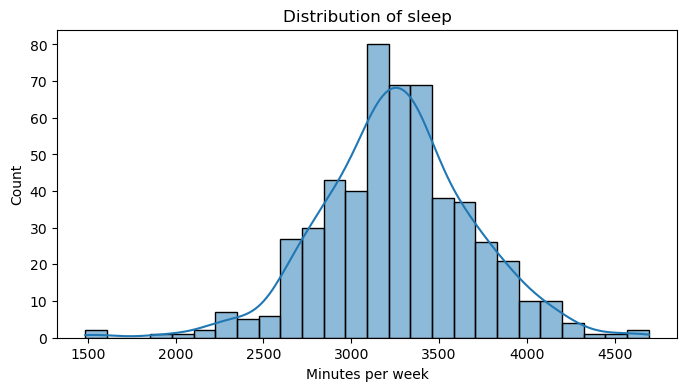

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(df[response_var], kde=True)
plt.title(f"Distribution of {response_var}")
plt.xlabel("Minutes per week")
plt.show()

### Pairplot for Selected Variables

We explore relationships between the response and key predictors.


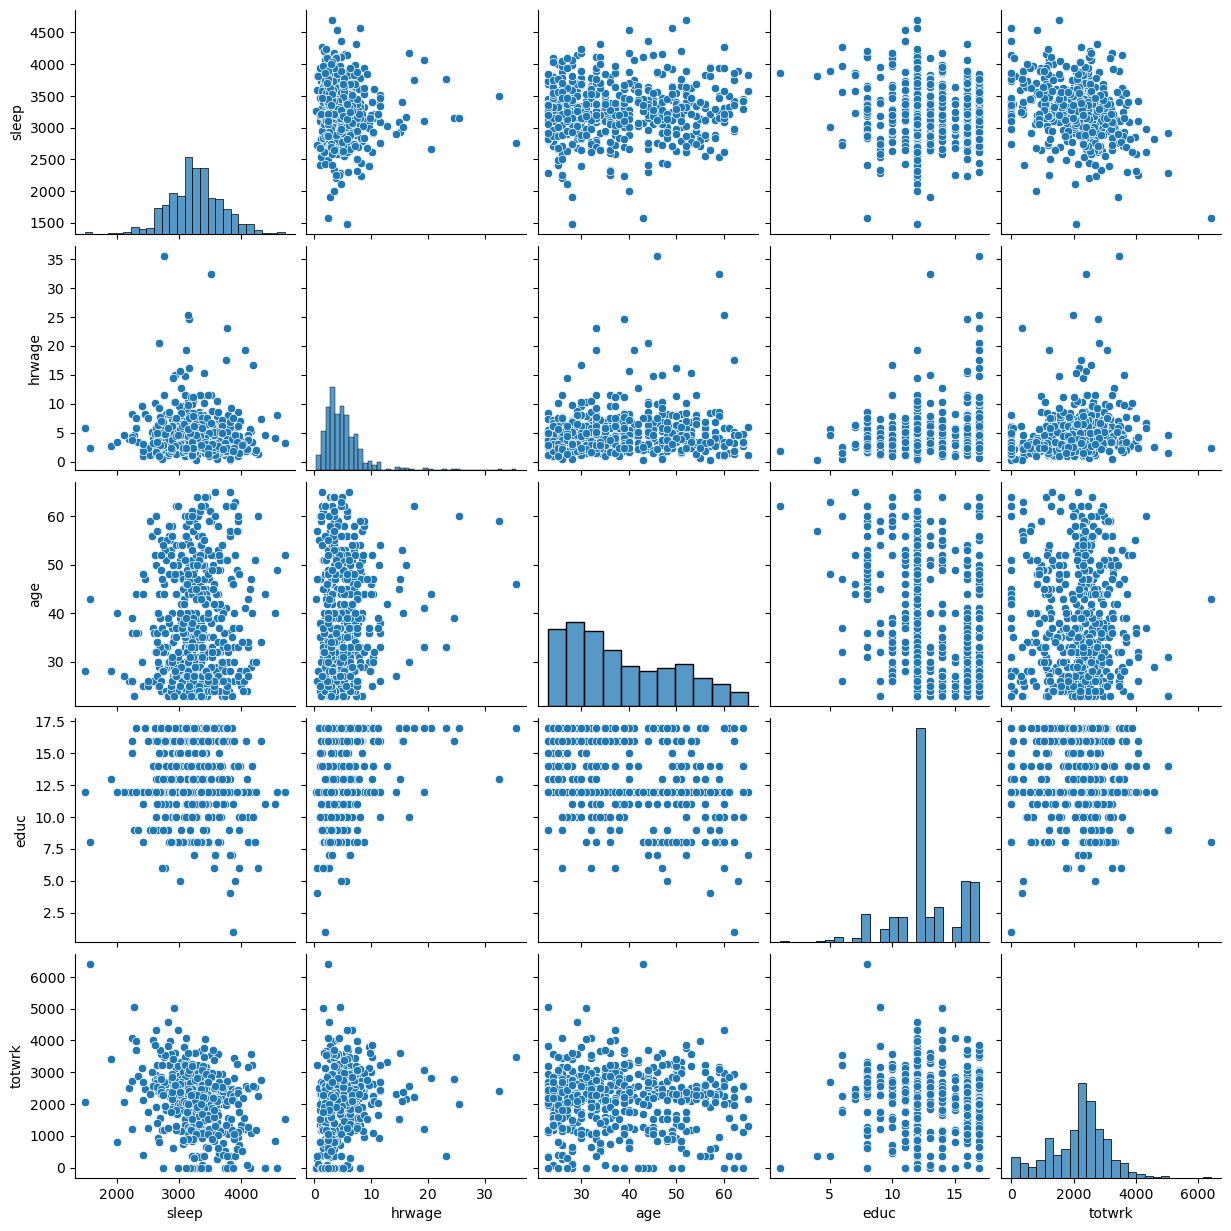

In [19]:
sns.pairplot(df[[response_var, "hrwage", "age", "educ", "totwrk"]].dropna())
plt.show()


## 6. Cross-sectional Graphics

#### Response vs Hourly Wage

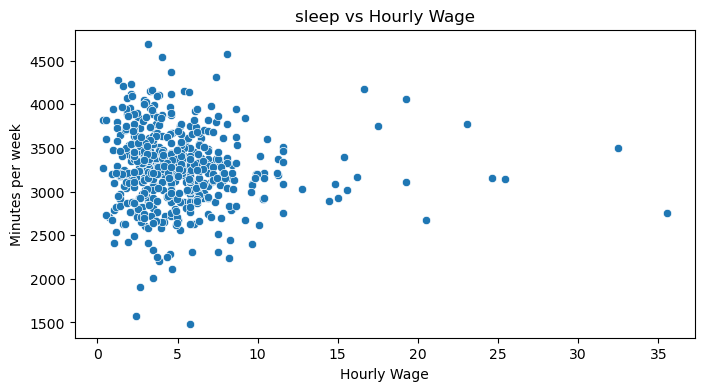

In [20]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="hrwage", y=response_var, data=df)
plt.title(f"{response_var} vs Hourly Wage")
plt.xlabel("Hourly Wage")
plt.ylabel("Minutes per week")
plt.show()


#### Response by Gender

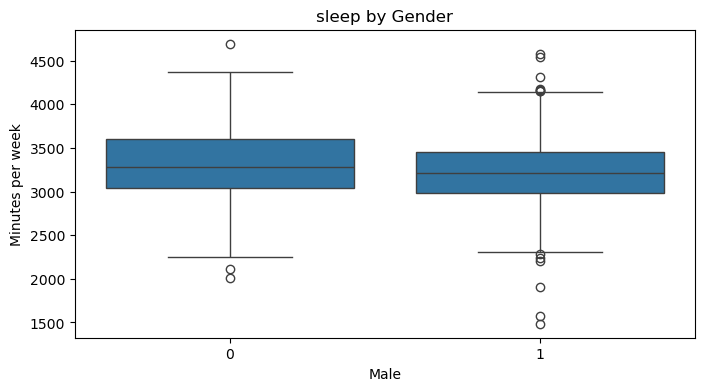

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(x="male", y=response_var, data=df)
plt.title(f"{response_var} by Gender")
plt.xlabel("Male")
plt.ylabel("Minutes per week")
plt.show()

## 7. Statistical Modeling

We estimate an OLS regression model for the response variable, using hourly wage and other controls.


In [22]:
X = df[["hrwage", "age", "educ", "totwrk", "male", "marr", "gdhlth"]]
X = sm.add_constant(X)
y = df[response_var]

model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     10.08
Date:                Fri, 30 May 2025   Prob (F-statistic):           7.48e-12
Time:                        20:44:14   Log-Likelihood:                -3947.9
No. Observations:                 532   AIC:                             7912.
Df Residuals:                     524   BIC:                             7946.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3647.8631    140.539     25.956      0.0

## 8. Discussion

- **Missing wage for non-workers:** Hourly wage is missing for those not in the labor force, which may introduce selection bias.
- **Endogeneity of wage:** Wage may be endogenous in the sleep equation; instrumental variables may be needed for causal inference.
- **Interpretation:** Review the coefficients, R-squared, and significance to interpret the relationship between sleep and the predictors.


## 9. Save Model Summary

We save the regression results for reporting.


In [23]:
model_summary = model.summary().as_text()
with open("model_summary.txt", "w") as f:
    f.write(model_summary)